# Importing modules

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# Loading the Dataset

In [87]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Checking null values in the dataframe

In [88]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

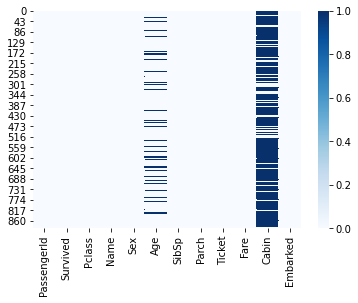

In [89]:
#data visualisation
sns.heatmap(df.isnull(),cmap='Blues')

Observation:
    Roughly 20% of age data is missing and 75% of cabin data is missing.

In [90]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [91]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Categorical data:
1. Name
2. Sex
3. Ticket
4. Cabin
5. Embarked

Numerical data:
1. PassengerId
2. Survived
3. Pclass
4. SibSp
5. Parch
6. Fare
7. Age

# EDA:

# Univariate Analysis:

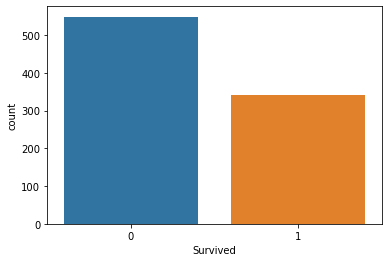

0    549
1    342
Name: Survived, dtype: int64
The percentage of people who died was 61.61616161616161 %


In [92]:
sns.countplot(x='Survived',data=df)
plt.show()
print(df['Survived'].value_counts())
print('The percentage of people who died was',(df['Survived'].value_counts()[0])/df.shape[0]*100,'%')

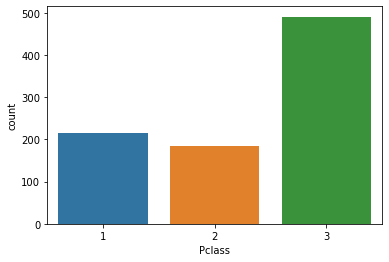

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [93]:
sns.countplot(x='Pclass',data=df)
plt.show()
print(df['Pclass'].value_counts())

In [94]:
print('The percentage of people travelling in all the class were:','\n',(df['Pclass'].value_counts())/df.shape[0]*100,'%')

The percentage of people travelling in all the class were: 
 3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64 %


Conclusion: Pclass 3 was the most crowded class

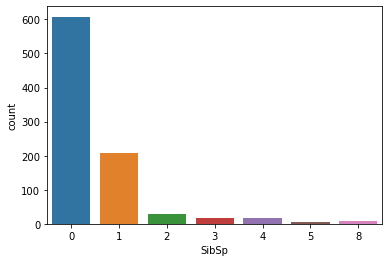

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


In [95]:
sns.countplot(x='SibSp',data=df)
plt.show()
print(df['SibSp'].value_counts())

Most people travelling didnot have sibling or spouse.

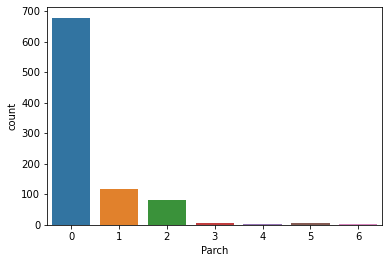

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [96]:
sns.countplot(x='Parch',data=df)
plt.show()
print(df['Parch'].value_counts())

Majority of children did tarvelling solo(not travelling with parents)

<AxesSubplot:xlabel='Age', ylabel='Count'>

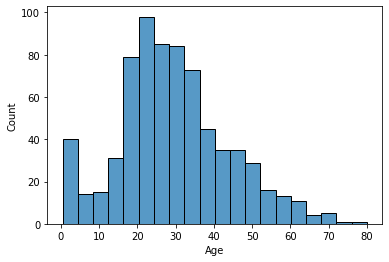

In [97]:
sns.histplot(data=df,x='Age')

observation: maximum people were in the age group of 20-35 years.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

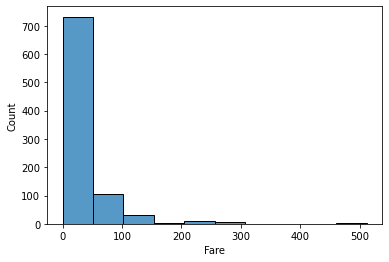

In [98]:
sns.histplot(data=df,x='Fare',bins=10)

Observation: Most people travelling were in the fare range of 0-50

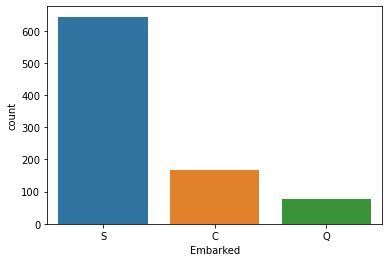

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [99]:
sns.countplot(x='Embarked',data=df)
plt.show()
print(df['Embarked'].value_counts())

In [100]:
print('The percentage of people travelling to S:',(df['Embarked'].value_counts()[0])/df.shape[0]*100,'%')
print('The percentage of people travelling to C:',(df['Embarked'].value_counts()[1])/df.shape[0]*100,'%')
print('The percentage of people travelling to D:',(df['Embarked'].value_counts()[2])/df.shape[0]*100,'%')

The percentage of people travelling to S: 72.27833894500561 %
The percentage of people travelling to C: 18.855218855218855 %
The percentage of people travelling to D: 8.641975308641975 %


# Multivariate Analysis:

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


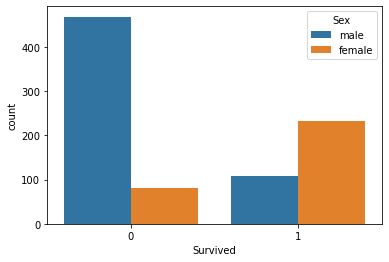

In [101]:
sns.countplot(x='Survived',hue='Sex',data=df)
pd.crosstab(df['Sex'],df['Survived']).apply(lambda x:round(x/x.sum()*100,1),axis=1)

Outcome:81% male didnot survive while 26% female did not survive

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

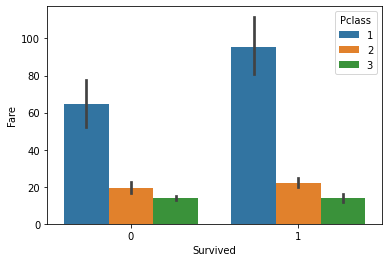

In [102]:
sns.barplot(x='Survived',y='Fare',hue='Pclass',data=df)

Observation: People who paid higher fare rates belongs to Pclass1 and were more likely to survive

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


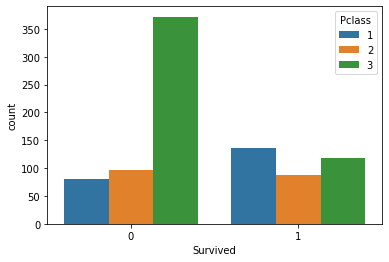

In [103]:
sns.countplot(x='Survived',hue='Pclass',data=df)
pd.crosstab(df['Pclass'],df['Survived']).apply(lambda x:round(x/x.sum()*100,1),axis=1)

Observation:
1. 37% people travelling in Pclass1 died.
2. 52.7% people travelling in Pclass2 died.
3. 75.8% people travelling in Pclass3 died.

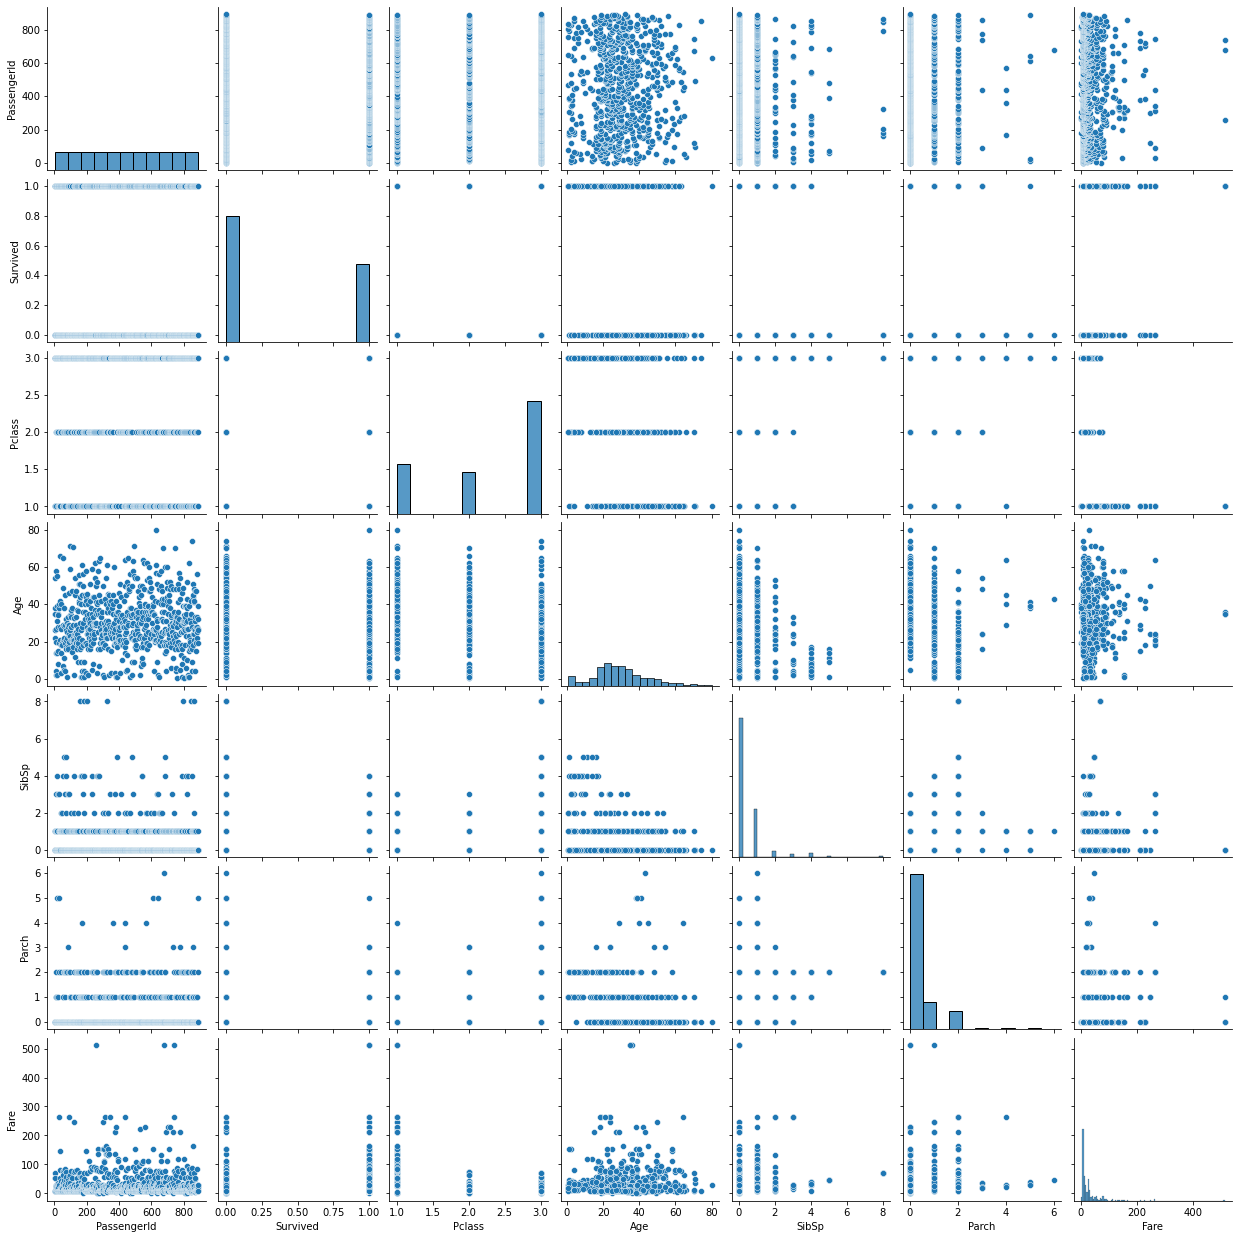

In [104]:
sns.pairplot(df)

# Data Set Description

In [105]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


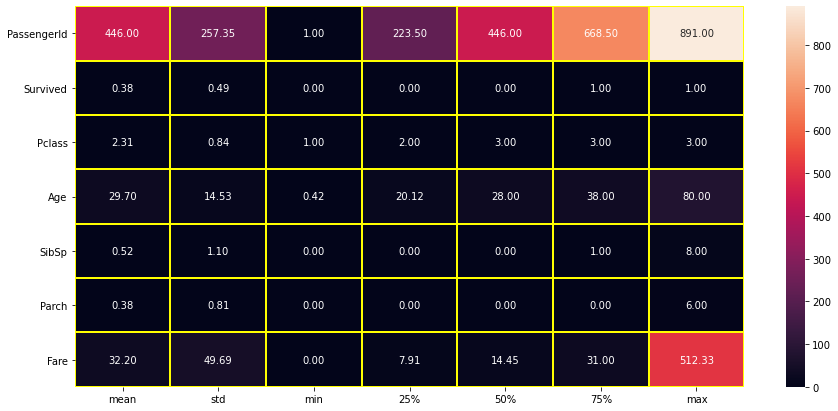

In [106]:
#visualisation
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidth=1,linecolor='yellow',fmt='.2f')
plt.show()

# Filling Missing Values:

In [107]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [108]:
df['Age']=df['Age'].fillna(np.mean(df['Age']))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


# Converting String data to Numerical Data

In [109]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [110]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,NaN,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,81.0,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,NaN,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,55.0,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,NaN,2.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,30.0,2.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,NaN,2.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,60.0,0.0


In [111]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [112]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.000000,1,0,7.2500,2.0
1,1,1,0.0,38.000000,1,0,71.2833,0.0
2,1,3,0.0,26.000000,0,0,7.9250,2.0
3,1,1,0.0,35.000000,1,0,53.1000,2.0
4,0,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,13.0000,2.0
887,1,1,0.0,19.000000,0,0,30.0000,2.0
888,0,3,0.0,29.699118,1,2,23.4500,2.0
889,1,1,1.0,26.000000,0,0,30.0000,0.0


In [113]:
df.dtypes

Survived      int64
Pclass        int64
Sex         float64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

# Checking null values

In [114]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<AxesSubplot:>

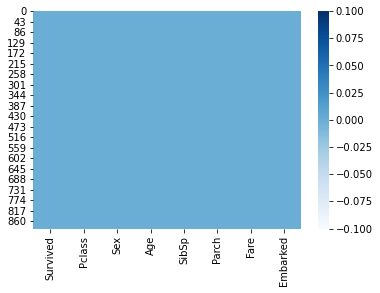

In [115]:
sns.heatmap(df.isnull(),cmap='Blues')

# Checking Skewness

In [116]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

keeping +/-0.5 as the range for the skewness here are the columns which doesnot lie within this range.
1.Pclass. --> numerical
2.Sex.--> categorical
3.SibSp-->numerical
4.Parch-->numerical
5.Fare-->numerical
6.Embarked-->Categorical 
7.Age-->numerical

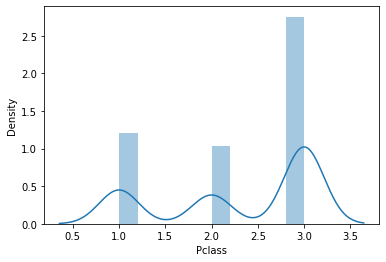

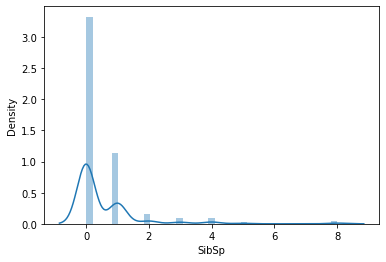

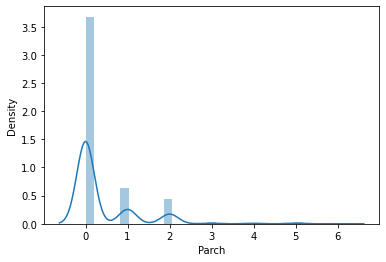

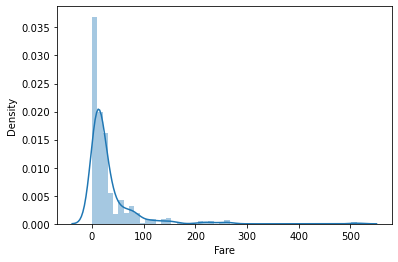

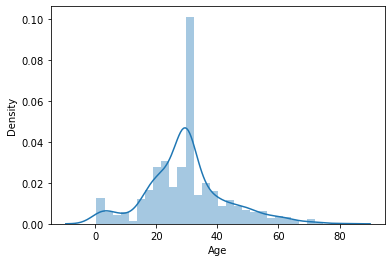

In [117]:
num_attrs=['Pclass','SibSp','Parch','Fare','Age']
for i in num_attrs:
    sns.distplot(df[i])
    plt.show()

Observation: Fare,Parch and SibSp are right skewed and age,Pclass are somewhat normally distributed.

# Correlation

In [118]:
df.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

<AxesSubplot:>

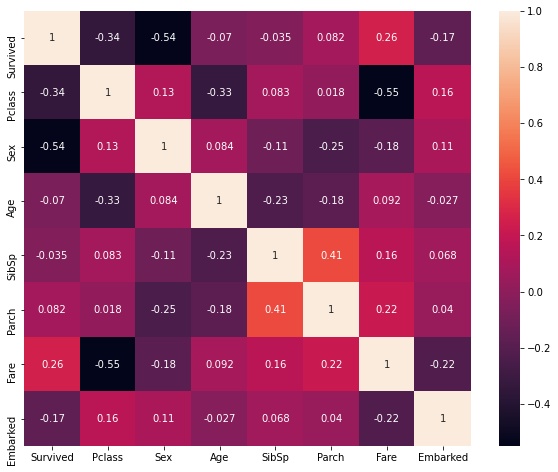

In [119]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

Observation:
1. Fare is positively correlated with target.
2. Sex is negatively correlated with target.
3. Parch and Fare have good correlation among themselve indicating with increase in Parch ,Fare also increases.
4. Here we can see that Parch and SibSp has a higher correlation, which generally makes sense since Parents are more likely to travel with their multiple kids and spouses tend to travel together.

# Outliers Checking:

Survived       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Pclass      AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Sex         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Age         AxesSubplot(0.731522,0.536818;0.168478x0.343182)
SibSp             AxesSubplot(0.125,0.125;0.168478x0.343182)
Parch          AxesSubplot(0.327174,0.125;0.168478x0.343182)
Fare           AxesSubplot(0.529348,0.125;0.168478x0.343182)
Embarked       AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

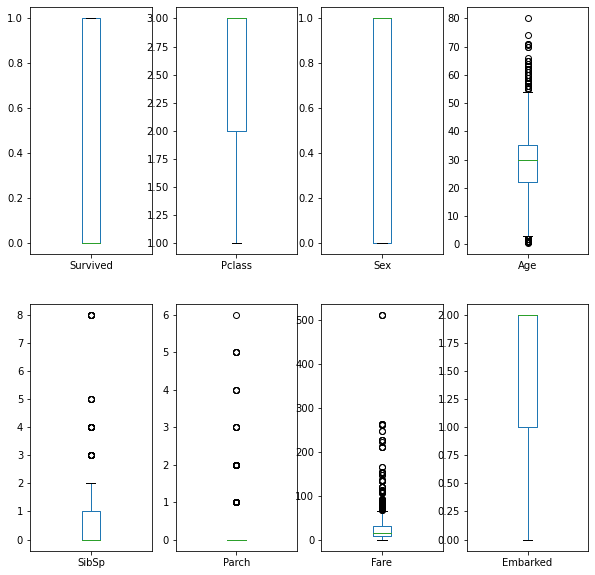

In [120]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10))

SInce the most of the data ponts are very close to the wiskers it cannot be treated as an outlier

# Checking if the target is balanced or not

In [121]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Preprocessing

# Transformation to remove skewness

In [122]:
df['Fare']=np.log(df['Fare']+1)

In [123]:
df['Fare'].skew()

0.3949280095189306

In [124]:
df['Parch']=np.log(df['Parch']+1)

In [125]:
df['SibSp']=np.log(df['SibSp']+1)

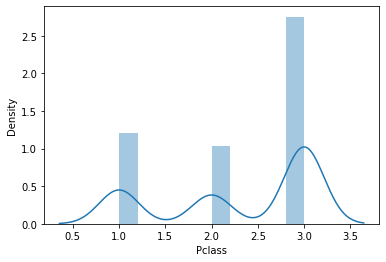

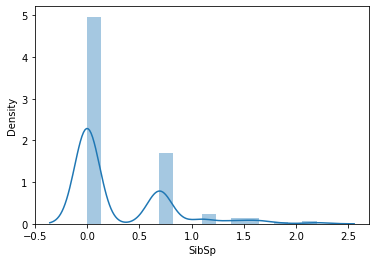

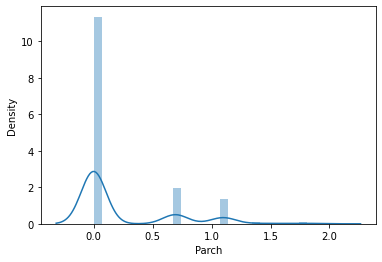

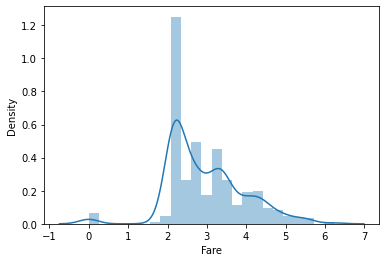

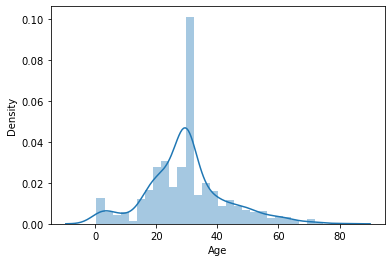

In [126]:
num_attrs=['Pclass','SibSp','Parch','Fare','Age']
for i in num_attrs:
    sns.distplot(df[i])
    plt.show()

In [127]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       1.661245
Parch       1.675439
Fare        0.394928
Embarked   -1.264823
dtype: float64

In [128]:
#independent column
x=df.iloc[:,1:]

In [129]:
#target
y=df['Survived']

In [130]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.000000,0.693147,0.000000,2.110213,2.0
1,1,0.0,38.000000,0.693147,0.000000,4.280593,0.0
2,3,0.0,26.000000,0.000000,0.000000,2.188856,2.0
3,1,0.0,35.000000,0.693147,0.000000,3.990834,2.0
4,3,1.0,35.000000,0.000000,0.000000,2.202765,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.000000,0.000000,0.000000,2.639057,2.0
887,1,0.0,19.000000,0.000000,0.000000,3.433987,2.0
888,3,0.0,29.699118,0.693147,1.098612,3.196630,2.0
889,1,1.0,26.000000,0.000000,0.000000,3.433987,0.0


In [131]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [132]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.52906043,
        -0.87974057,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.52906043,
         1.36121993, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.52906043,
        -0.79853997,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  2.1410429 ,
         0.24200664,  0.58595414],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.52906043,
         0.48708246, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.52906043,
        -0.81898658, -0.67817453]])

# Since our outcome has only two variable we will use binary classification model

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))
        print('\n')

At random state 154 The model performs very well
Training Accuracy Score is: 79.9
Testing Accuracy Score is: 79.9


At random state 407 The model performs very well
Training Accuracy Score is: 79.9
Testing Accuracy Score is: 79.9


At random state 485 The model performs very well
Training Accuracy Score is: 79.9
Testing Accuracy Score is: 79.9


At random state 723 The model performs very well
Training Accuracy Score is: 79.9
Testing Accuracy Score is: 79.9


At random state 794 The model performs very well
Training Accuracy Score is: 79.9
Testing Accuracy Score is: 79.9


At random state 857 The model performs very well
Training Accuracy Score is: 79.9
Testing Accuracy Score is: 79.9


At random state 889 The model performs very well
Training Accuracy Score is: 79.9
Testing Accuracy Score is: 79.9


At random state 915 The model performs very well
Training Accuracy Score is: 79.9
Testing Accuracy Score is: 79.9


At random state 959 The model performs very well
Training Accuracy Score

In [134]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Logistic Regression Model

In [135]:
#selecting random state=154
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=154,test_size=0.20)
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print('Training Accuracy Score is:',round(accuracy_score(y_train,pred_train)*100,1))
print('Testing Accuracy Score is:',round(accuracy_score(y_test,pred_test)*100,1))

Training Accuracy Score is: 79.9
Testing Accuracy Score is: 79.9


# CROSS VALIDATION OF THE MODEL

In [136]:
from sklearn.model_selection import cross_val_score
for k in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=k)
    cv_mean=cv_score.mean()
    print('At crossfold=',k,'the cv score is',cv_mean)
    print('training score :',accuracy_score(y_train,pred_train))
    print('testing score :',accuracy_score(y_test,pred_test))
    print('\n')

At crossfold= 2 the cv score is 0.7867561848138258
training score : 0.7991573033707865
testing score : 0.7988826815642458


At crossfold= 3 the cv score is 0.7867564534231201
training score : 0.7991573033707865
testing score : 0.7988826815642458


At crossfold= 4 the cv score is 0.7901516987839857
training score : 0.7991573033707865
testing score : 0.7988826815642458


At crossfold= 5 the cv score is 0.7834034272801456
training score : 0.7991573033707865
testing score : 0.7988826815642458


At crossfold= 6 the cv score is 0.7867464780216458
training score : 0.7991573033707865
testing score : 0.7988826815642458


At crossfold= 7 the cv score is 0.7867600534308211
training score : 0.7991573033707865
testing score : 0.7988826815642458


At crossfold= 8 the cv score is 0.790128297940798
training score : 0.7991573033707865
testing score : 0.7988826815642458


At crossfold= 9 the cv score is 0.7867564534231202
training score : 0.7991573033707865
testing score : 0.7988826815642458




In [137]:
#selecting cv=8 as it is very close to testing score
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
for i in model:
    i.fit(x_train,y_train)
    ipred=i.predict(x_test)
    i.score(x_train,y_train)
    print(i)
    print('accuracy score:',accuracy_score(y_test,ipred))
    cv_score=cross_val_score(i,x,y,cv=8)
    cv_mean=cv_score.mean()
    print('the cv score is',cv_mean)
    print(confusion_matrix(y_test,ipred))
    print(classification_report(y_test,ipred))
    print('\n')

DecisionTreeClassifier()
accuracy score: 0.7821229050279329
the cv score is 0.7935871138996139
[[90 21]
 [18 50]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       111
           1       0.70      0.74      0.72        68

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



KNeighborsClassifier()
accuracy score: 0.7988826815642458
the cv score is 0.8047679375804375
[[97 14]
 [22 46]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       111
           1       0.77      0.68      0.72        68

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



SVC()
accuracy score: 0.8156424581005587
the cv score is 0.8271899131274132
[[97 14]
 [19 49]]
              precisi

# Ensemble Techniques

# Ramdom Forest Classifier

In [138]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,rfpred))
cv_score=cross_val_score(rf,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

accuracy score: 0.8212290502793296
the cv score is 0.8025860682110681
[[98 13]
 [19 49]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       111
           1       0.79      0.72      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



# Adaboost Classifier

In [139]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()     
ad.fit(x_train,y_train)
adpred=ad.predict(x_test)
ad.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,adpred))
cv_score=cross_val_score(ad,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,adpred))
print(classification_report(y_test,adpred))

accuracy score: 0.8324022346368715
the cv score is 0.810368404118404
[[93 18]
 [12 56]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       111
           1       0.76      0.82      0.79        68

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.84      0.83      0.83       179



# GradientBoosting Classifier

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=200)    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,gbpred))
cv_score=cross_val_score(gb,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

accuracy score: 0.8603351955307262
the cv score is 0.8384210102960103
[[101  10]
 [ 15  53]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       111
           1       0.84      0.78      0.81        68

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



# Voting Classifier

In [141]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('KNN',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('RFC',RandomForestClassifier()))

In [142]:
#voting classifier with hard voting
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(x_train,y_train)
vot_hardpred=vot_hard.predict(x_test)
vot_hard.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,vot_hardpred))
cv_score=cross_val_score(vot_hard,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,vot_hardpred))
print(classification_report(y_test,vot_hardpred))

accuracy score: 0.8324022346368715
the cv score is 0.8204834298584298
[[101  10]
 [ 20  48]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       111
           1       0.83      0.71      0.76        68

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



# HYPER PARAMETER TUNING USING GRID SEARCH CV

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
#tuning gradient boosting model
grid_param={'n_estimators':[100,150,200,250,300],'learning_rate':[0.1,0.01,0.001,1,10,100]}
model=GradientBoostingClassifier()
grid=GridSearchCV(estimator=model,param_grid=grid_param,scoring='accuracy',cv=8)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)

GridSearchCV(cv=8, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 1, 10, 100],
                         'n_estimators': [100, 150, 200, 250, 300]},
             scoring='accuracy')
0.837304938867439
friedman_mse
{'learning_rate': 0.1, 'n_estimators': 200}


In [145]:
gb=GradientBoostingClassifier(n_estimators=200,learning_rate=0.1)    
gb.fit(x_train,y_train)
gbpred=gb.predict(x_test)
gb.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,gbpred))
cv_score=cross_val_score(gb,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

accuracy score: 0.8603351955307262
the cv score is 0.8384210102960103
[[101  10]
 [ 15  53]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       111
           1       0.84      0.78      0.81        68

    accuracy                           0.86       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.86      0.86       179



In [146]:
#tuning random forest model
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':[100,200,300,350],'max_features':['auto','sqrt','log2'],'max_depth':[5,10]}
rf=RandomForestClassifier()
rfg=GridSearchCV(rf,parameters)
rfg.fit(x_train,y_train)
print(rfg.best_params_)

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}


In [147]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=200,max_features='log2',max_depth=5)
rf.fit(x_train,y_train)
rfpred=rf.predict(x_test)
rf.score(x_train,y_train)
print('accuracy score:',accuracy_score(y_test,rfpred))
cv_score=cross_val_score(rf,x,y,cv=8)
cv_mean=cv_score.mean()
print('the cv score is',cv_mean)
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

accuracy score: 0.8491620111731844
the cv score is 0.8350929054054054
[[103   8]
 [ 19  49]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       111
           1       0.86      0.72      0.78        68

    accuracy                           0.85       179
   macro avg       0.85      0.82      0.83       179
weighted avg       0.85      0.85      0.85       179



# CONCLUSION:

Selecting Gradient Boosting Classifier as our final model as the model is performing well having cv score and testing score almost equal.

# ROC AUC CURVE

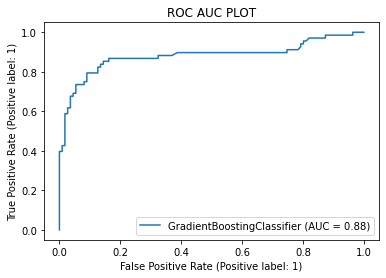

In [148]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gb,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

AUC SCORE IS 88%

In [149]:
original=np.array(y_test)
predicted=np.array(gbpred)
df_com=pd.DataFrame({'Original':original,'Predicted':predicted},index=range(len(original)))
df_com

,Original,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
174,0,0
175,0,0
176,1,1
177,0,0


# SAVING BEST MODEL

In [150]:
import joblib

In [151]:
joblib.dump(gb,'gbfile.obj')

['gbfile.obj']